In [1]:
import numpy as np
import pandas as pd

# 붓꽃(iris) 데이터 다운로드

In [2]:
from sklearn.datasets import load_iris
iris = load_iris()
iris.keys()

dict_keys(['data', 'target', 'target_names', 'DESCR', 'feature_names', 'filename'])

- 기계학습을 위한 파이썬 패키지인 사이킷런(scikit-learn)에서 붓꽃 데이터를 읽어 옴

In [4]:
iris['target_names']
type(iris)

sklearn.utils.Bunch

- 붓꽃 데이터는 세 개의 품종 Iris-Setosa, Iris-Versicolor, Iris-Virginica에 속하는 150개의 꽃잎(petal)과 꽃받침(sepal)의 너비와 길이로 이루어진 데이터임

In [5]:
iris_pd = pd.DataFrame(data= np.c_[iris['data'], iris['target']],
                     columns= iris['feature_names'] + ['target'])

- 붓꽃 데이터를 판다스(pandas)의 데이터프레임 객체로 변환함

In [7]:
iris_pd.info()
iris_pd.head()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 150 entries, 0 to 149
Data columns (total 5 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   sepal length (cm)  150 non-null    float64
 1   sepal width (cm)   150 non-null    float64
 2   petal length (cm)  150 non-null    float64
 3   petal width (cm)   150 non-null    float64
 4   target             150 non-null    float64
dtypes: float64(5)
memory usage: 6.0 KB


,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm),target
0,5.1,3.5,1.4,0.2,0.0
1,4.9,3.0,1.4,0.2,0.0
2,4.7,3.2,1.3,0.2,0.0
3,4.6,3.1,1.5,0.2,0.0
4,5.0,3.6,1.4,0.2,0.0


# 데이터 분할

In [26]:
from sklearn.model_selection import train_test_split
train_set, test_set = train_test_split(iris_pd, test_size=0.2, random_state=42)

- 훈련 데이터(train data)와 평가 데이터(test data)를 8대2의 비율로 분할
- 다음번 실행에서도 같은 데이터 생성을 위해 난수 발생기의 초깃값을 '42'로 지정

In [9]:
train_set.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 120 entries, 22 to 102
Data columns (total 5 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   sepal length (cm)  120 non-null    float64
 1   sepal width (cm)   120 non-null    float64
 2   petal length (cm)  120 non-null    float64
 3   petal width (cm)   120 non-null    float64
 4   target             120 non-null    float64
dtypes: float64(5)
memory usage: 5.6 KB


In [10]:
test_set.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 30 entries, 73 to 30
Data columns (total 5 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   sepal length (cm)  30 non-null     float64
 1   sepal width (cm)   30 non-null     float64
 2   petal length (cm)  30 non-null     float64
 3   petal width (cm)   30 non-null     float64
 4   target             30 non-null     float64
dtypes: float64(5)
memory usage: 1.4 KB


In [11]:
train_set.head(10)

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm),target
22,4.6,3.6,1.0,0.2,0.0
15,5.7,4.4,1.5,0.4,0.0
65,6.7,3.1,4.4,1.4,1.0
11,4.8,3.4,1.6,0.2,0.0
42,4.4,3.2,1.3,0.2,0.0
146,6.3,2.5,5.0,1.9,2.0
51,6.4,3.2,4.5,1.5,1.0
27,5.2,3.5,1.5,0.2,0.0
4,5.0,3.6,1.4,0.2,0.0
32,5.2,4.1,1.5,0.1,0.0


- head()를 통해 초기 10개의 데이터를 출력함
- 'target'은 세 개의 품종 Iris-Setosa, Iris-Versicolor, Iris-Virginica를 각각 0.0 1.0 2.0으로 구분한 값

# 데이터 시각화

In [ ]:
!pip install chart-studio
!pip install plotly-geo

import chart_studio.plotly as py
import plotly.graph_objs as go
import plotly.figure_factory as ff

# Cufflinks wrapper on plotly
import cufflinks as cf

# Display all cell outputs
from IPython.core.interactiveshell import InteractiveShell

# plotly + cufflinks in offline mode
from plotly.offline import iplot
cf.go_offline()

# set the global theme
cf.set_config_file(world_readable=True, theme='pearl', offline=True)

- plotly 패키지를 이용하면 인터랙티브 산점도 행렬(interactive scatterplot matix)를 만들 수 있음
- plotly 패키지와 cufflinks 패키지는 pip로 설치 후 사용

In [ ]:
fig = ff.create_scatterplotmatrix(
    iris_pd,
    height=800,
    width=800, 
    diag='histogram', # scatter, histogram, box
    index='target')



PlotlyRequestError: ignored

- plotly.offline의 iplot을 사용하여 오프라인 모드에서 산점도 행렬을 그린 결과
- diag='histogram'으로 대각 행렬 위치에는 각 변수의 히스토그램을 표시
- index='species'를 사용하여 3개 종(setosa, versicolor, virginica) 별로 색깔을 다르게 구분

# 결정트리 훈련과 시각화

In [12]:
from sklearn.tree import DecisionTreeClassifier
tree_clf = DecisionTreeClassifier(criterion='entropy', max_depth=2)

- 사이킷런은 결정트리를 훈련시키기 위해 CART(Classification And Regression Tree) 알고리즘을 사용함
- CART는 C4.5와 달리 각 노드에서 이진분리만 수행함
- crtieon 매개변수의 값을 통해 '지니 불순도(gini)'나 '엔트로피(entropy)' 선택 가능

In [13]:
features = list(train_set.columns[:4])
features

['sepal length (cm)',
 'sepal width (cm)',
 'petal length (cm)',
 'petal width (cm)']

In [14]:
X = train_set[features]
y = train_set['target']

In [15]:
tree_clf.fit(X, y)

DecisionTreeClassifier(ccp_alpha=0.0, class_weight=None, criterion='entropy',
                       max_depth=2, max_features=None, max_leaf_nodes=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, presort='deprecated',
                       random_state=None, splitter='best')

In [17]:
from sklearn.tree import export_graphviz
export_graphviz(
    tree_clf,
    out_file='iris_tree.dot',    
    feature_names=features,
    rounded=True,
    filled=True)    

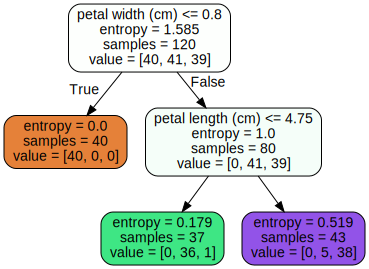

In [18]:
import graphviz
with open("iris_tree.dot") as f:
    dot_graph = f.read()
dot = graphviz.Source(dot_graph)
dot.format = 'png'
dot.render(filename='iris_tree', directory='./', cleanup=True)
dot

- 아나콘다 배포판을 사용하고 있다면 conda install python-graphviz 명령으로 패키지를 설치를 해야 함

# 결정트리 평가

In [19]:
X_test = test_set[features]
y_test = test_set['target']

In [21]:
y_pred = tree_clf.predict(X_test)
y_pred[:10]

array([1., 0., 2., 1., 2., 0., 1., 2., 1., 1.])

In [22]:
from sklearn.metrics import classification_report, confusion_matrix  
print(confusion_matrix(y_test, y_pred))  
print(classification_report(y_test, y_pred))  

[[10  0  0]
 [ 0  8  1]
 [ 0  0 11]]
              precision    recall  f1-score   support

         0.0       1.00      1.00      1.00        10
         1.0       1.00      0.89      0.94         9
         2.0       0.92      1.00      0.96        11

    accuracy                           0.97        30
   macro avg       0.97      0.96      0.97        30
weighted avg       0.97      0.97      0.97        30



# 과제 - 와인(wine) 데이터로 결정트리 훈련과 평가하기

In [23]:
from sklearn.datasets import load_wine
wine = load_wine()
print(wine.DESCR)

.. _wine_dataset:

Wine recognition dataset
------------------------

**Data Set Characteristics:**

    :Number of Instances: 178 (50 in each of three classes)
    :Number of Attributes: 13 numeric, predictive attributes and the class
    :Attribute Information:
 		- Alcohol
 		- Malic acid
 		- Ash
		- Alcalinity of ash  
 		- Magnesium
		- Total phenols
 		- Flavanoids
 		- Nonflavanoid phenols
 		- Proanthocyanins
		- Color intensity
 		- Hue
 		- OD280/OD315 of diluted wines
 		- Proline

    - class:
            - class_0
            - class_1
            - class_2
		
    :Summary Statistics:
    
    ============================= ==== ===== ======= =====
                                   Min   Max   Mean     SD
    ============================= ==== ===== ======= =====
    Alcohol:                      11.0  14.8    13.0   0.8
    Malic Acid:                   0.74  5.80    2.34  1.12
    Ash:                          1.36  3.23    2.36  0.27
    Alcalinity of Ash:            1

- 와인의 화학 조성을 사용하여 와인의 종류를 예측하기 위한 데이터
- load_wine() 명령으로 읽어올 수 있으며, 위와 같이 구성되어 있음

## 문제

1. 와인 데이터를 8대 2의 비율로 학습 데이터와 평가 데이터로 분할한 후, 학습 데이터에 대해 결정트리를 훈련하세요.
2. 평가 데이터에서 훈련된 결정트리의 성능을 측정하세요.
3. DecisionTreeClassifier()에서 criterion 매개변수를 '지니 불순도(gini)'나 '엔트로피(entropy)로 바꿨을 때 훈련된 결정트리와 그 성능에 어떤 차이가 있는지 설명하시오.
4. DecisionTreeClassifier()에서 max_depth의 값을 바꿧을 때 훈련된 결정트리의 모양과 그 성능에 어떤 차이가 있는지 설명하시오.